Author: **Kajetan Bochajczuk**

*Importing of all necessary libraries and tuning some of the global settings.*

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize
from mpl_toolkits.mplot3d import Axes3D

In [2]:
matplotlib.rcParams['figure.figsize'] = [10, 6]
matplotlib.rcParams['figure.dpi'] = 600
matplotlib.rc('font', family='Lato', size=12)

# Exercise 1
Generate a time series of $20$ observations according to
$$
y_t = \alpha + \epsilon_t
$$
where $\epsilon_t \sim \mathcal{N}(0, \sigma^2)$. Choose values of $\alpha$ and $\sigma^2$.

In [3]:
ALPHA = 1
SIGMA = 1
N = 20

In [4]:
epsilon = np.random.normal(loc=0, scale=SIGMA, size=N)
y = ALPHA + epsilon
t = np.arange(N)

We will plot the $y_t$ to see how they look

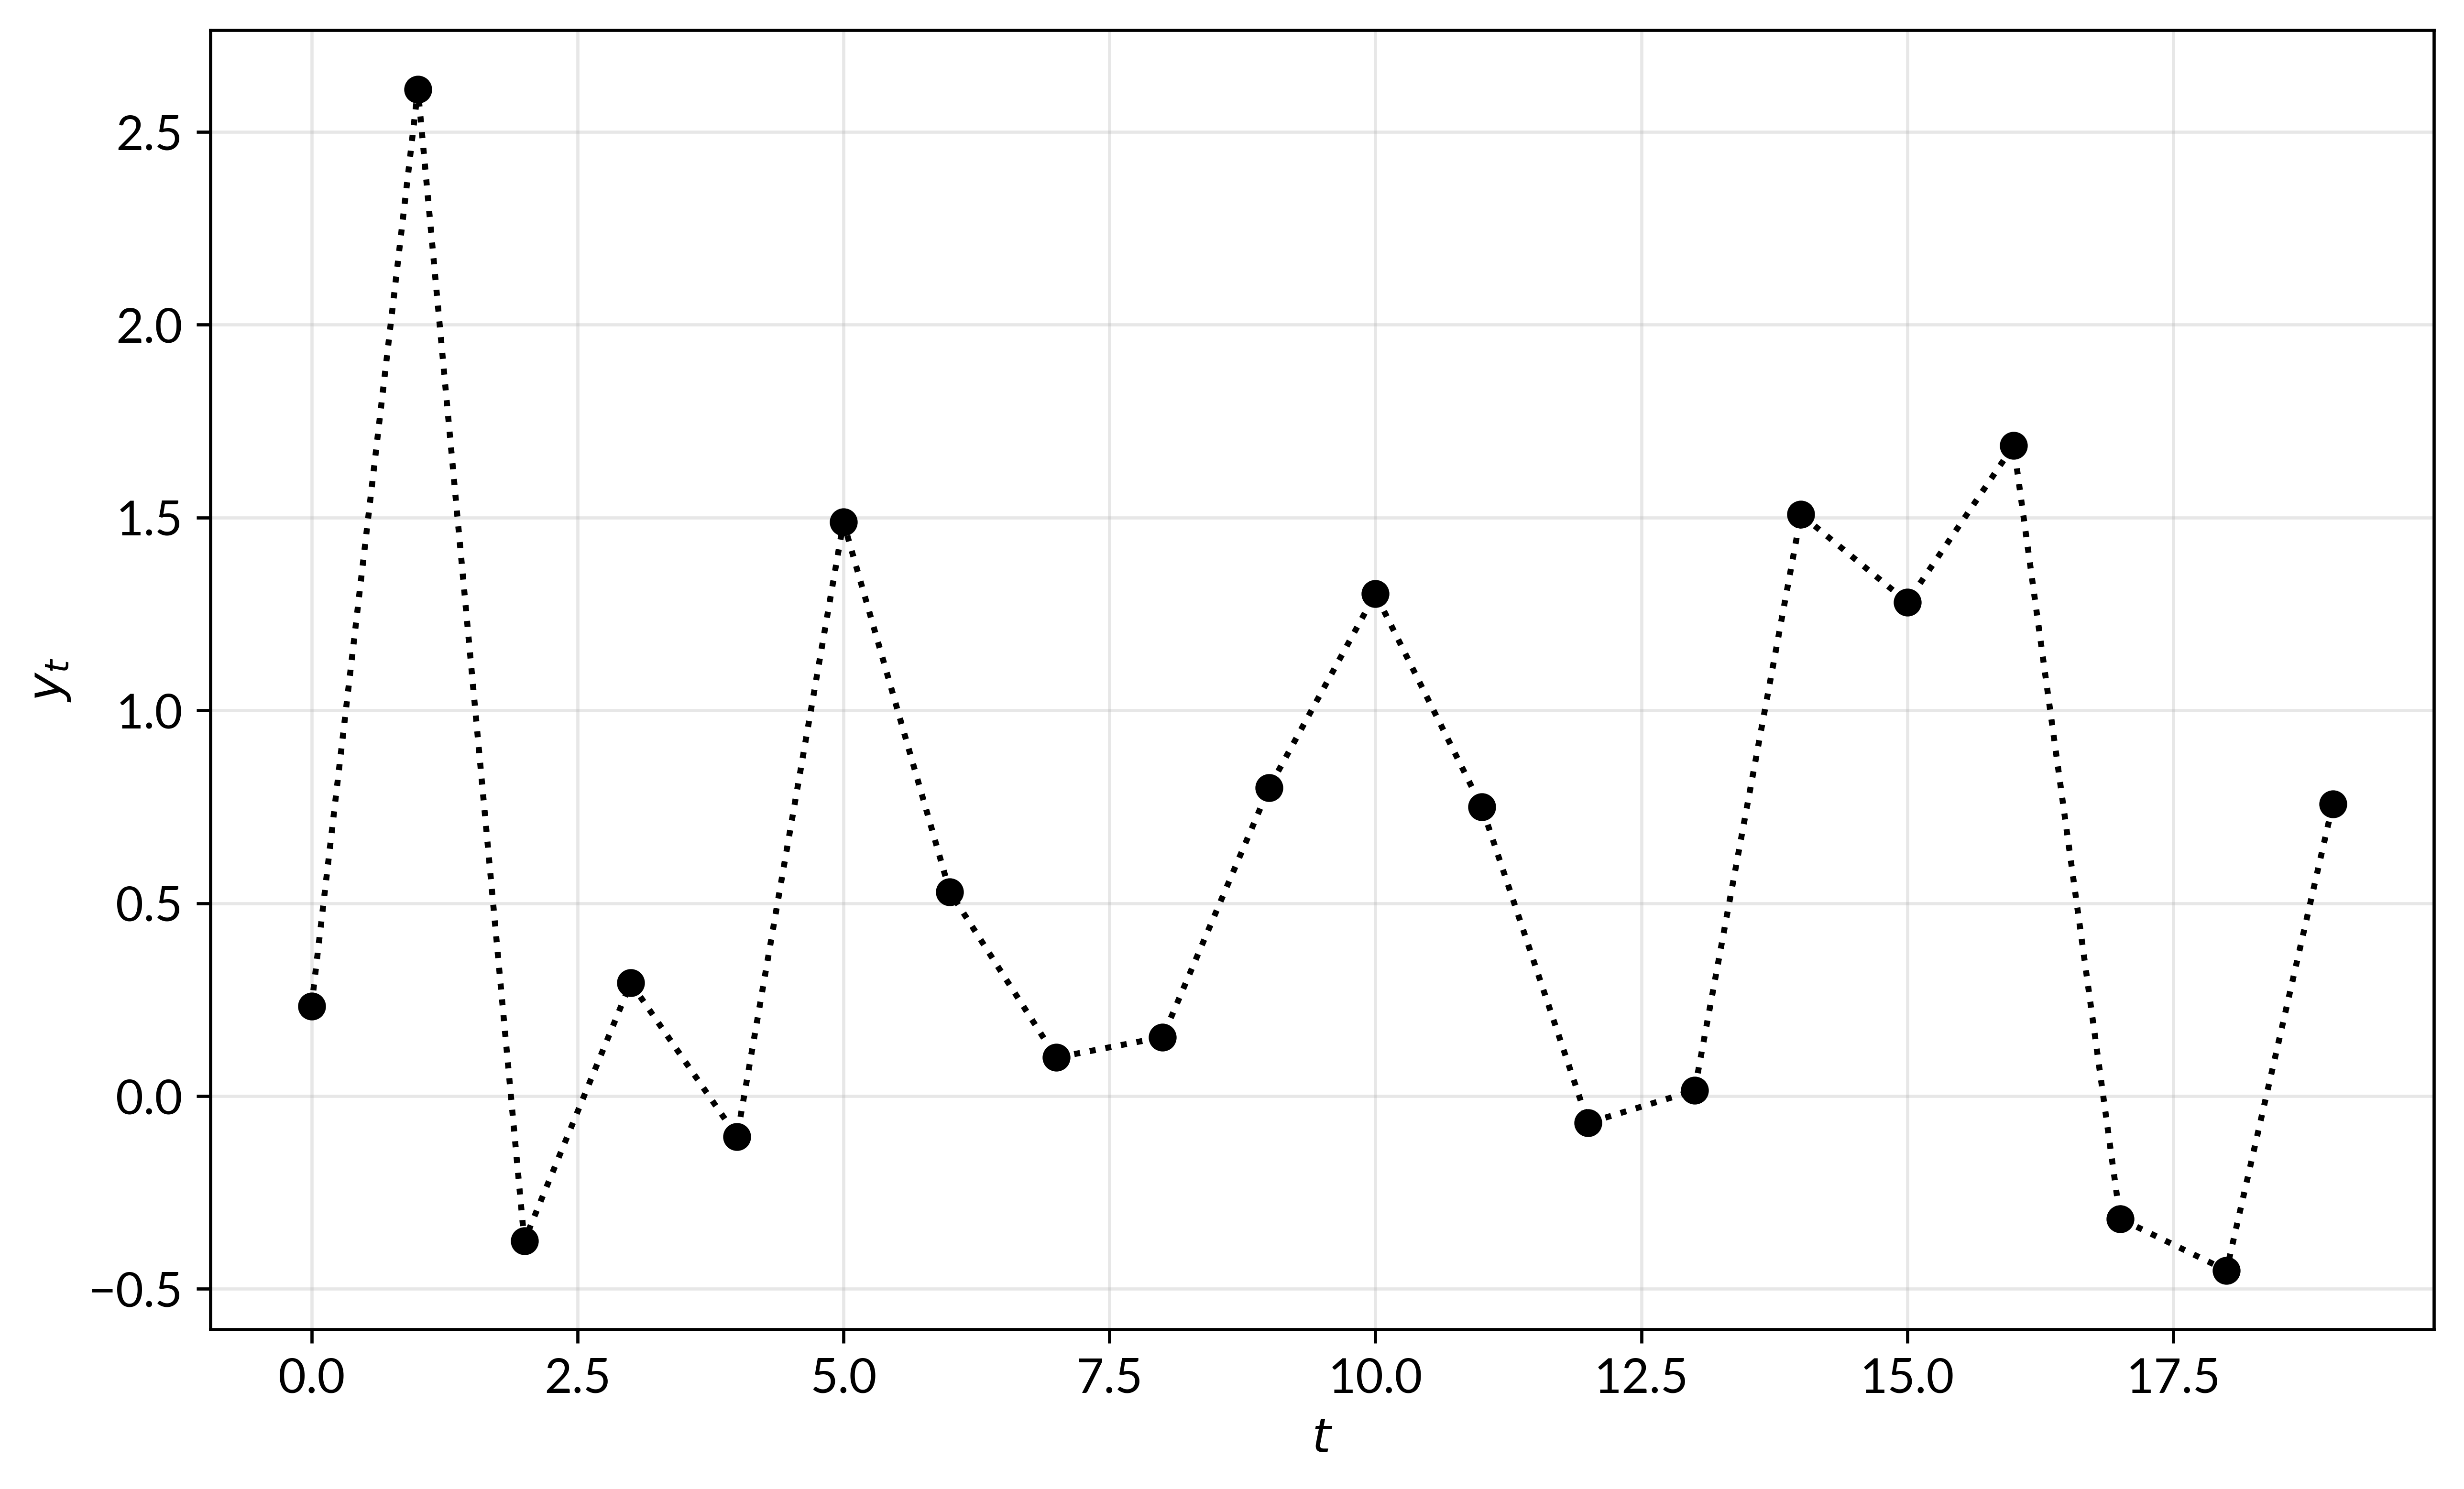

In [5]:
plt.plot(t, y, linestyle=':', marker='o', color='black')
plt.grid(alpha=0.3)
plt.xlabel('$t$')
plt.ylabel('$y_t$')
plt.show()

**(a)** Write down the density function of a single observation, the likelihood and the log-likelihood for the whole sample, as the function of a parameter vector $\theta$.

Since
$$
\epsilon_t \sim \mathcal{N}(0, \sigma^2)
$$
thus
$$
y_t \sim \mathcal{N}(\alpha, \sigma^2)
$$
as a simple shift of center by a constant $\alpha$.
Let's denote vector 
$$
\theta = [ \alpha, \sigma^2 ]^\intercal
$$
as a vector parameters. Then the density function of a single observation is of a following form
$$
f(y_t | \theta) =
\frac{1}{\sqrt{2\pi\sigma^2}} \exp\left\{ -\frac{(y_t - \alpha)^2}{2\sigma^2} \right\}
$$
Based on the density function we can write the likelihood function as 
$$
L(\theta| y_1, \dots, y_N) =\prod\limits_{t=1}^{N}\frac{1}{\sqrt{2\pi \sigma^2}}\exp\left\{ -\frac{(y_t - \alpha)^2}{2\sigma^2}\right\} =  \left(\frac{1}{\sqrt{2\pi \sigma^2}}\right)^{N} \exp\left\{ -\sum\limits_{t=1}^{N}\frac{(y_t - \alpha)^2}{2\sigma^2}\right\} .
$$
To write the log-likelihood function we simply take a logarithm of the above formula (as the name suggests)
$$
l(\theta | y_1, \dots, y_N) = 
N \ln (2\pi\sigma^2)^{-1/2} - \sum_{t=1}^N \frac{(y_t - \alpha)^2}{2\sigma^2} =
- \frac{N}{2} (\ln2\pi + \ln\sigma^2) - \frac{1}{2\sigma^2} \sum_{t=1}^N (y_t - \alpha)^2
$$

**(b)** Plot the log-likelihood function for a range of parameter values

First we define the log-likelihood function.

In [6]:
def log_likelihood(y, alpha=0, sigma=1, N=20):
    return -0.5 * N * (np.log(2 * np.pi) + np.log(sigma ** 2)) - np.sum((y - alpha) ** 2) / (2 * sigma ** 2)

Then we set intervals for each parameter

In [7]:
alphas = np.linspace(-5, 5)
sigmas = np.linspace(1, 1.5)

We calculate the values in that domain (for previous $y_t$)

In [8]:
log_likelihoods = np.zeros(shape=(len(alphas), len(sigmas)))
for i, alpha in enumerate(alphas):
    for j, sigma in enumerate(sigmas):
        log_likelihoods[i, j] = log_likelihood(y, alpha=alpha, sigma=sigma)

And we generate a 3D plot.

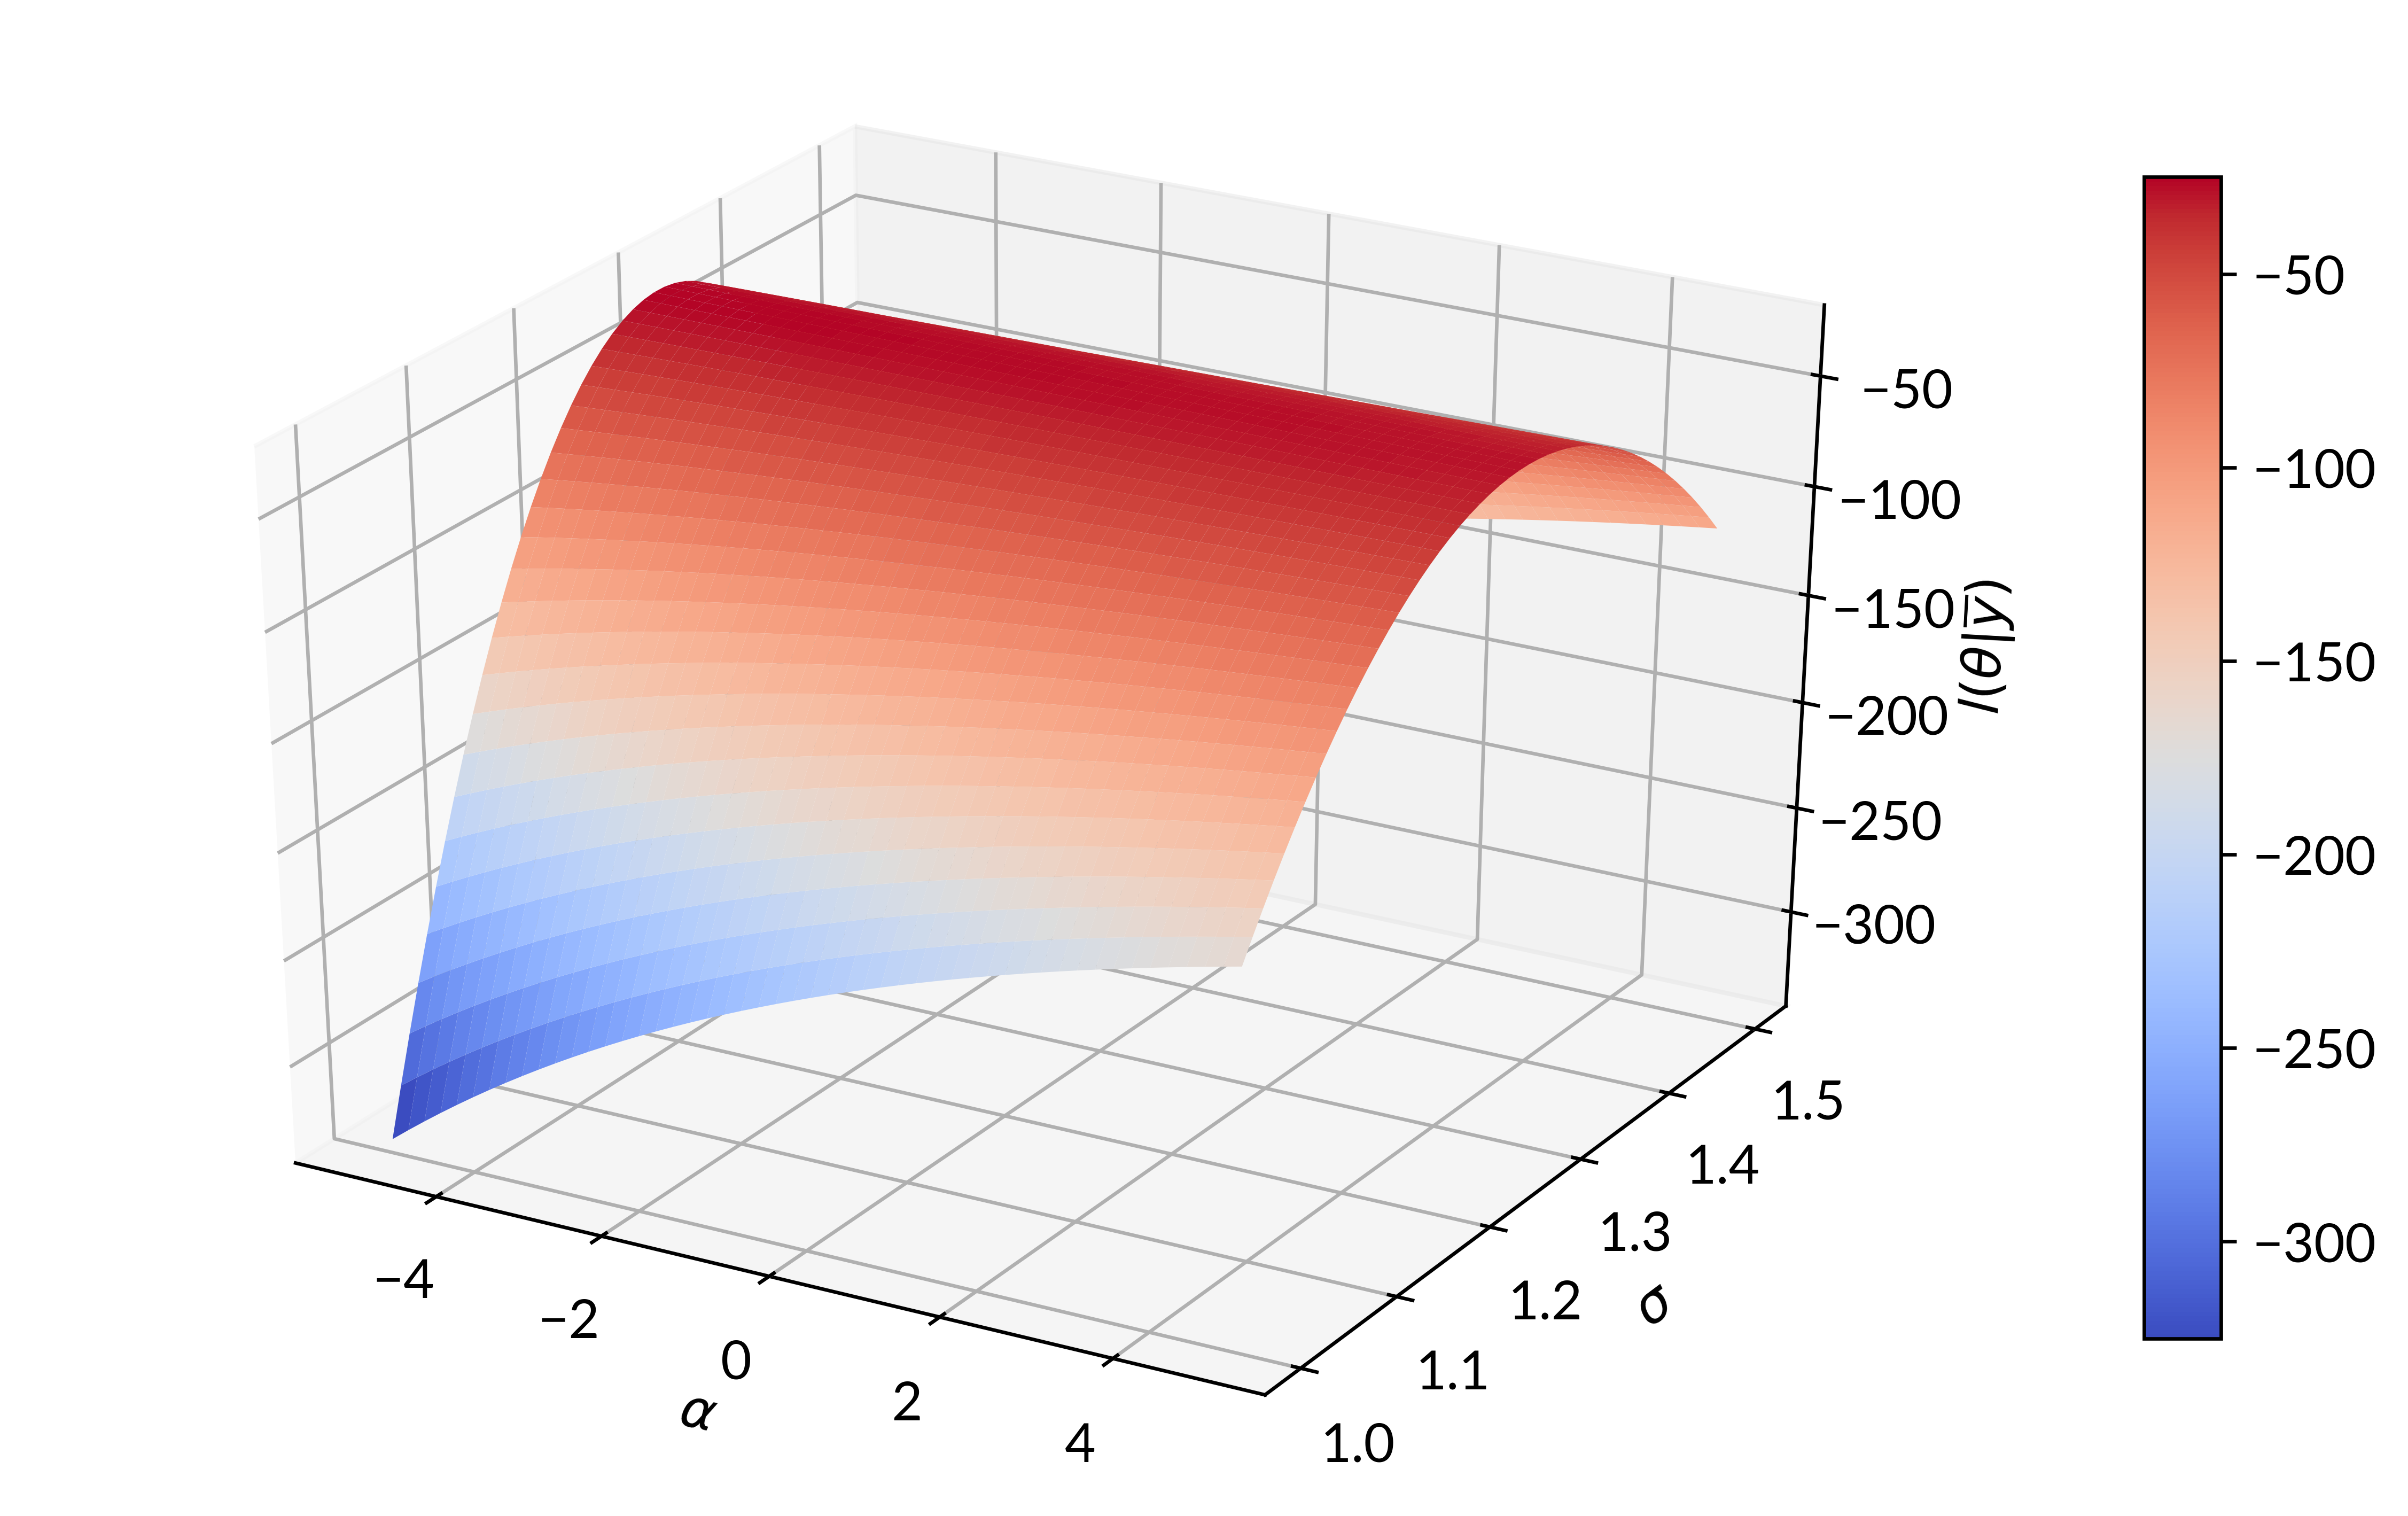

In [9]:
x, y = np.meshgrid(alphas, sigmas)
fig = plt.figure()
ax = fig.gca(projection='3d')
surface = ax.plot_surface(x, y, log_likelihoods, cmap=matplotlib.cm.coolwarm)
fig.colorbar(surface, shrink=0.8, aspect=15)
ax.set_xlabel(r'$ \alpha $')
ax.set_ylabel(r'$ \sigma $')
ax.set_zlabel(r'$ l(\theta | \overline{y}) $')
plt.show()

**(c)** Derive the FOC and the ML estimator of model parameters.

We know that logarithm is a monotonic function, thus the maximum of $l(\theta | y)$ occurs at the same value of $\theta$ as does the maximum of $L(\theta | y)$. If $l$ is differentiable in $\theta^\star$ (where $\theta^\star$ denotes the maximizer/minimizer), then the first order conditions are as follows

$$
\frac{\partial}{\partial \alpha}l(\theta^\star |y) = 0, \\
\frac{\partial}{\partial \sigma^2}l(\theta^\star | y) = 0.
$$

So we need to calculate two derivates.

$$
\frac{\partial}{\partial \alpha}l(\theta |y) = 
\frac{1}{\sigma^2} \sum\limits_{t=1}^{N}(y_t - \alpha)=
\frac{N}{\sigma^2}\cdot \frac{1}{N} \sum\limits_{i=t}^{N}(y_t - \alpha)= \frac{N}{\sigma^2}(\bar{y} - \alpha)
$$
$$
\frac{\partial}{\partial \sigma^2}l(\theta | y) =
- \frac{N}{2} \cdot \frac{1}{\sigma^2}- \frac{1}{2\sigma^4}\sum\limits_{t=1}^{N}(y_t - \alpha)^2 =
- \frac{N}{\sigma^2}- \frac{1}{2\sigma^4} \sum\limits_{t=1}^{N}(y_t - \alpha)^2. 
$$ 

where $\bar y$ denote mean of the vector $y$.

Plugging those into FOC we obtain following set of equations

$$
\frac{N}{\sigma^2}(\bar{y} - \alpha)= 0,
$$
$$
- \frac{N}{\sigma^2}- \frac{1}{2\sigma^4} \sum\limits_{t=1}^{N}(y_t - \alpha)^2= 0.
$$

Solving them yields the estimator.

$$
\hat{\alpha}= \bar{y},
$$
$$
\hat\sigma^2 = \frac{1}{N}\sum\limits_{t=1}^{N}(y_t - \hat{\alpha})^2. 
$$

So estimator of the $\alpha$ parameter is simply the overage of $y$, while estimator of $\sigma^2$ is a biased etimator of variance.



# Exercise 2
Download a data set `data_lab4-1.xlsx`. Suppose $y$ has a mix normal distribution, which depends on $\theta = [\mu, \sigma^2, p]^\intercal$

$$
y \sim 
\left\{ 
\begin{array}{ll}
\mathcal N(0, 1), & p \\
\mathcal N(\mu, \sigma^2), & 1 - p
\end{array}
\right.
$$

First we open the data set.

In [10]:
data1 = pd.read_excel(r'data_lab4-1.xlsx', header=None)[0].values

And then, just to check, plot it

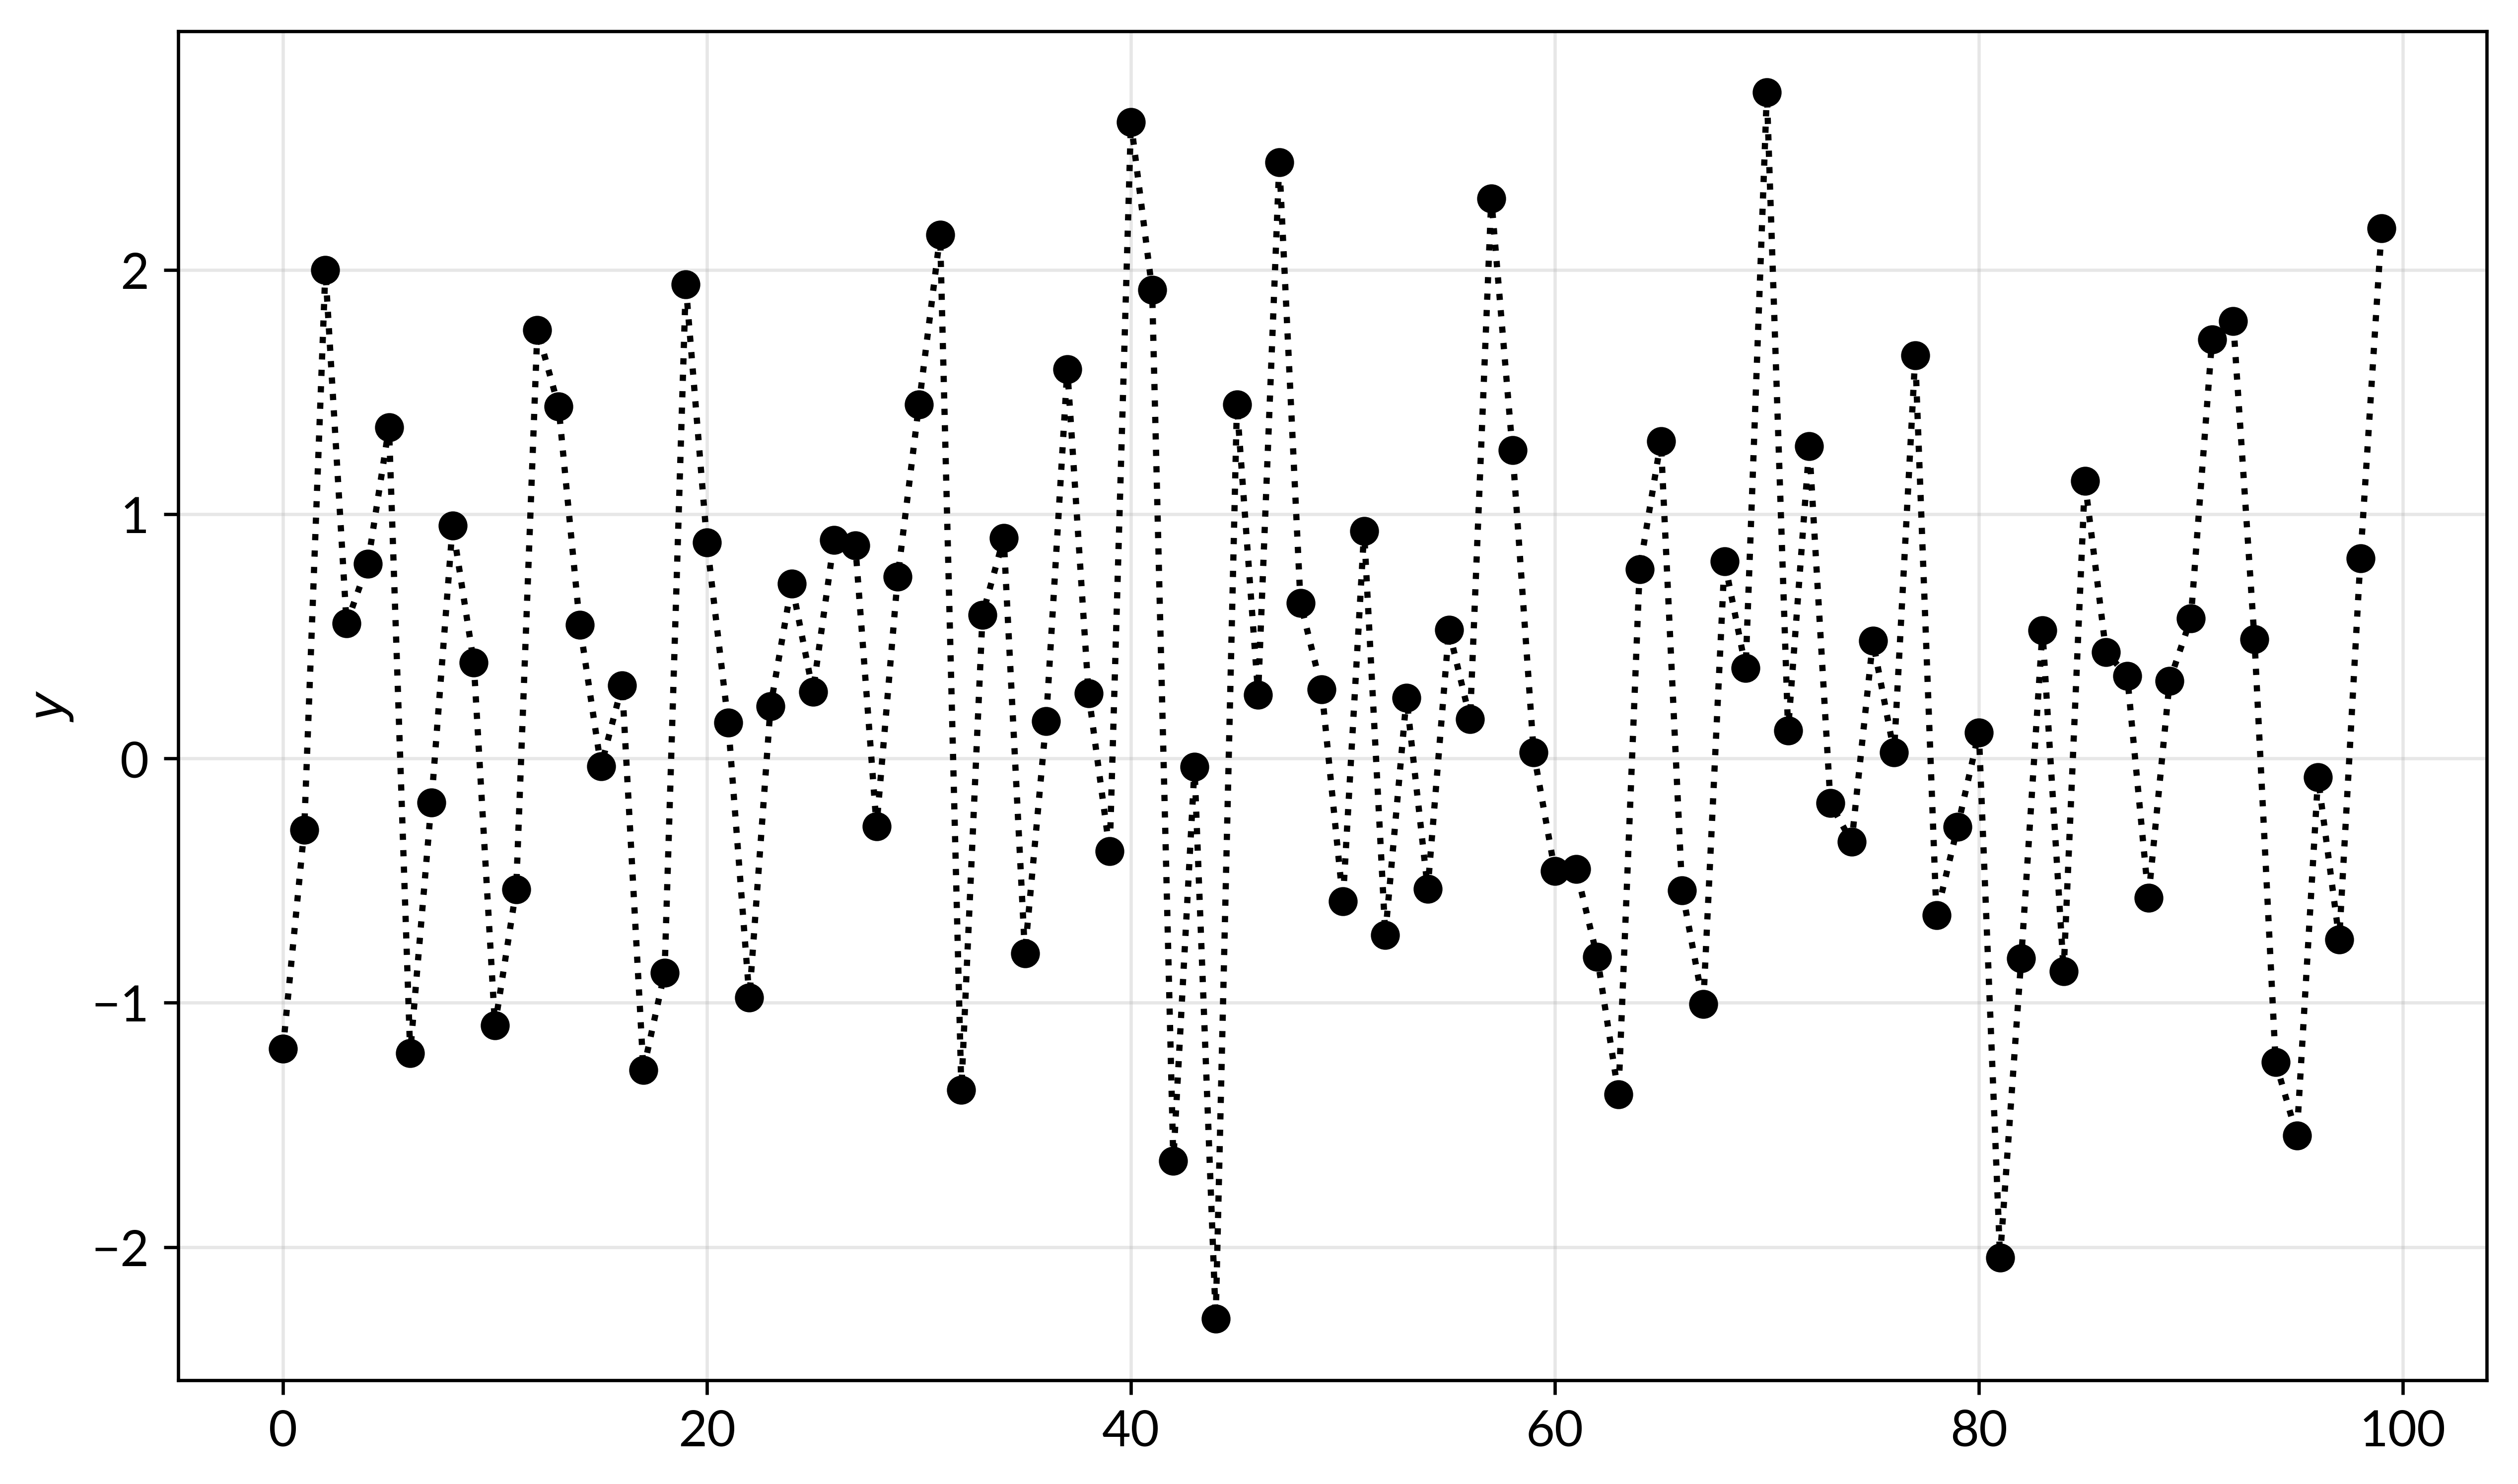

In [11]:
plt.plot(data1, linestyle=':', marker='o', color='black')
plt.grid(alpha=0.3)
plt.ylabel('$y$')
plt.show()

**(a)** Write down the likelihood and the log-likelihood function.

Let's introduce two new variables $y_1$ and $y_2$ such that

$$
y_1 \sim \mathcal N(0, 1)
$$

and

$$
y_2 \sim \mathcal N(\mu, \sigma^2).
$$

Then we have that

$$
f_{y_1}(y) = \frac{1}{\sqrt{2\pi}}\exp\left\{ \frac{-y^2}{2} \right\}
$$

and 

$$
f_{y_2}(y) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp \left\{ \frac{-(y - \mu)^2}{2\sigma^2} \right\}.
$$

Using those variables we can write the probability density function of $y$

$$
f_y(y) = p f_{y_1}(y) + (1 - p) f_{y_2}(y).
$$

Therefore

$$
f_y(y)=  \frac{p}{\sqrt{2\pi}} \exp\left\{ -\frac{y^2}{2}\right\} +\frac{1 - p}{\sqrt{2\pi\sigma^2}}\exp\left\{-\frac{(y-\mu)^2}{2\sigma^2}\right\}.
$$

Based on that we can write the likelihood function

$$
L(\theta| y) =\prod\limits_{t=1}^{N}\left( \frac{p}{\sqrt{2\pi}} \exp \left\{-\frac{y_t^2}{2}\right\}+ \frac{1-p}{\sqrt{2\pi\sigma^2}} \exp \left\{-\frac{(y_t-\mu)^2}{2\sigma^2}\right\}\right)
$$

and the log-likelihood function

$$
l(\theta | y) = 
\ln\left(\prod\limits_{t=1}^{N}\left( \frac{p}{\sqrt{2\pi}} \exp \left\{-\frac{y_t^2}{2}\right\}+ \frac{1-p}{\sqrt{2\pi\sigma^2}} \exp \left\{-\frac{(y_t-\mu)^2}{2\sigma^2}\right\}\right)\right) =
$$
$$
\sum\limits_{t=1}^{N}\ln\left(\frac{p}{\sqrt{2\pi}}\exp\left\{-\frac{y_t^2}{2}\right\} + \frac{1-p}{\sqrt{2\pi\sigma^2}}\exp\left\{-\frac{(y_t-\mu)^2}{2\sigma^2}\right\}\right).
$$

**(b)** Suppose $p=0.8$. Let's set $\mu=y_1$. Plot the log-likelihood function for different values of $\sigma^2$, particulary for $\sigma^2$ close to $0$. (Hint: make sure that $\sigma^2$ approaches $0$ fast enough, for example $\sigma = \exp\{-N\} $).

First we set the constants and interval of $\sigma$'s.

In [12]:
mu = data1[0]
p = 0.8
# sigmas = np.linspace(0.01, 5)
sigmas = np.logspace(-8, 1)

And define another log-likelihood function (for this specific case):

In [13]:
def log_likelihood_2(ys, mu=0, sigma=1, p=0.5):
    _ = 0
    for y in ys:
        _ += np.log(p / np.sqrt(2 * np.pi) * np.exp(-(y ** 2) / 2) + (1 - p) / np.sqrt(2 * np.pi * sigma ** 2) * np.exp(-(y - mu) ** 2 / (2 * sigma ** 2)))
    return _

Then we simply calculate values of the log-likelihood function:

In [14]:
log_likelihoods_2 = []
for sigma in sigmas:
    log_likelihoods_2.append(log_likelihood_2(data1, mu, sigma, p))

And we plot the result where the **x-axis is in logarithmic scale** to clearly display the behaviour close to zero.

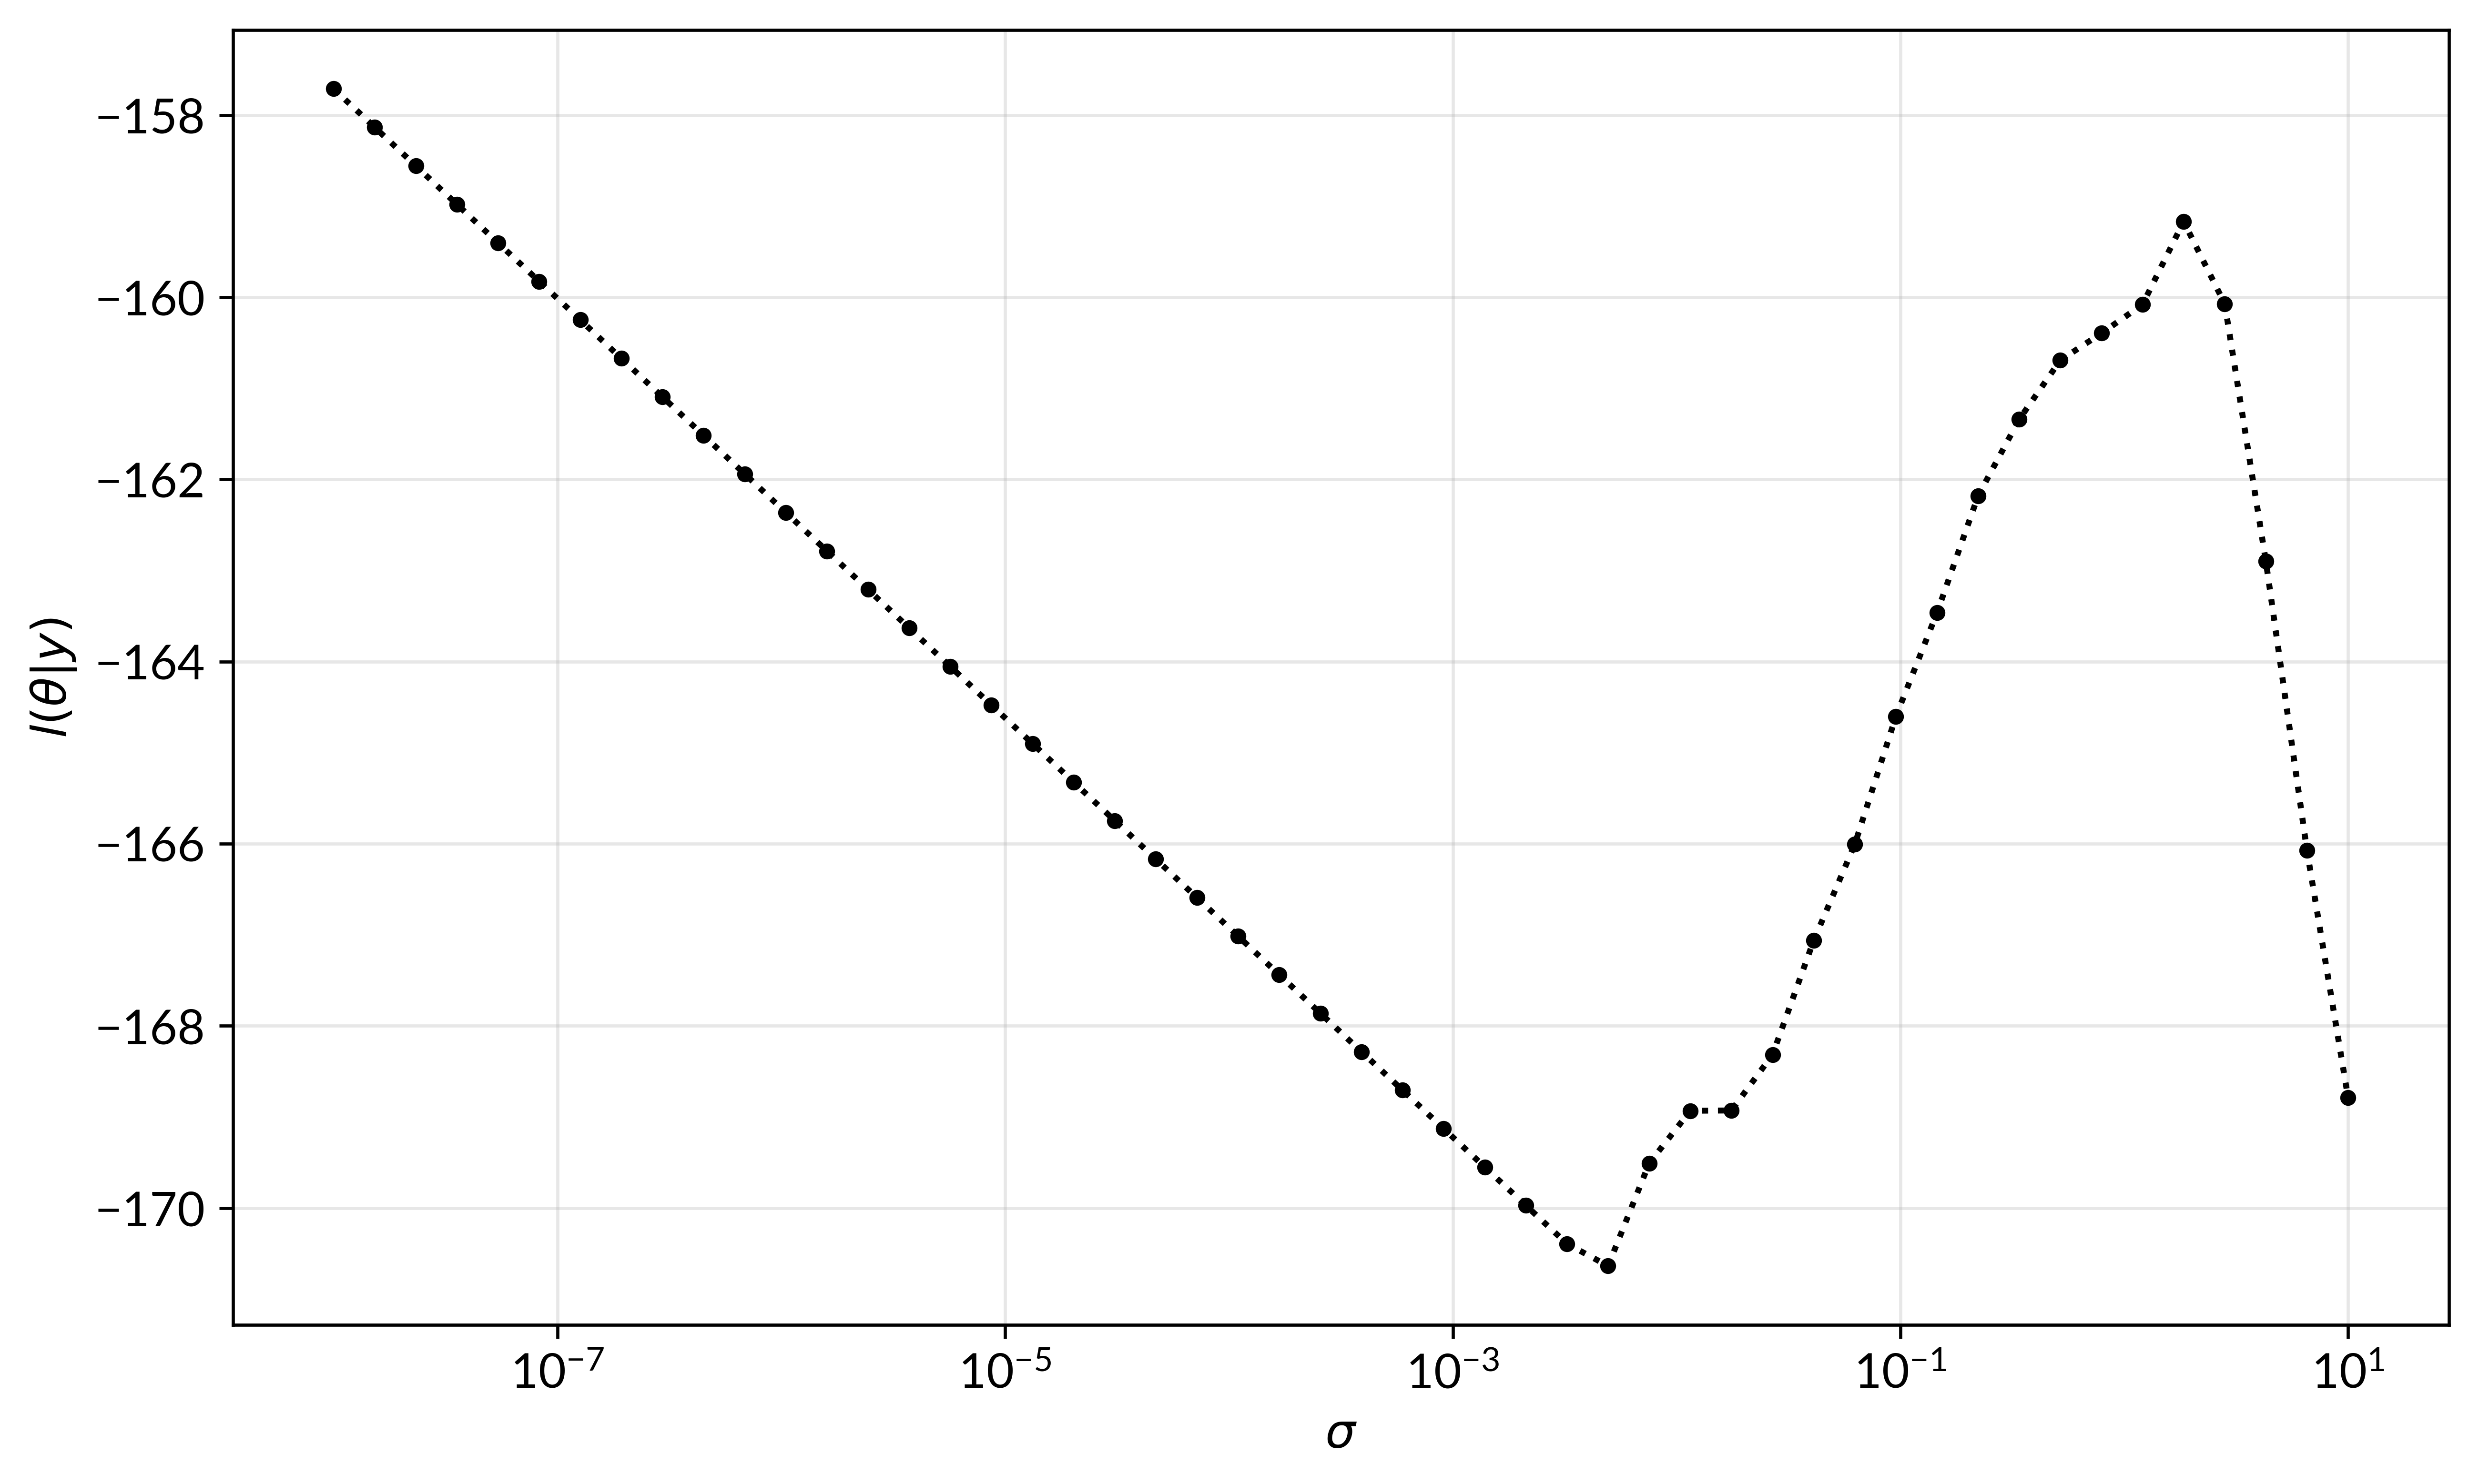

In [15]:
plt.plot(sigmas, log_likelihoods_2, linestyle=':', marker='.', color='black')
plt.xlabel(r'$\sigma$')
plt.ylabel(r'$l(\theta | y)$')
plt.gca().set_xscale('log')
plt.grid(alpha=0.3)

**(c)** What can you say about the existence of the maximum of the log-likelihood function?

One may think that the function has a clear maximum in the $[0.1, 10]$ interval, but as we can see it grows asymptoticaly around $0$ and does not reach a maximum value.

# Exercise 3
Download the data set `data_lab4-2.xlsx`. The first colum is $y$, the second column describes $x$. Suppose $y$ has a Bernoulli distribution

$$
y_n = \left\{ 
\begin{array}{ll}
1 & \mbox{, $F(x_n;\theta)$}\\
0 & \mbox{, $1-F(x_n;\theta)$}\\
\end{array} 
\right.
$$

The probability of success is given by a logit function

$$
F(x_n;\theta)=\frac{\exp\{{\theta_1+x_n \theta_2}\}}{1+\exp\{{\theta_1+x_n \theta_2}\}}
$$

First we read the data and display few of the first values to check if it loaded correctly.

In [16]:
data2 = pd.read_excel('data_lab4-2.xlsx', header=None).values
data2[:5, :]

array([[ 0.        , -0.80098888],
       [ 1.        ,  1.91804873],
       [ 0.        , -3.94687605],
       [ 0.        , -2.00098085],
       [ 0.        ,  0.47390692]])

**(a)** What is the marginal effect of the variable $x$ on the probability of success? (*Hint:* marginal effect is the first derivative of $\text{prob}(y = 1)$ with respect to $x$)

We calculate the derivative of $\text{prob}(y = 1)$ with respect to $x$

$$
\frac{\partial F(x_n;\theta)}{\partial x_n} = 
\frac{\partial }{\partial x_n}\Bigl(\frac{\exp\{{\theta_1+x_n \theta_2}\}}{1+\exp\{{\theta_1+x_n \theta_2}\}}\Bigr) = 
\frac{\theta_2 \exp\{{\theta_1+x_n \theta_2}\}}{(1+\exp\{{\theta_1+x_n \theta_2}\})^2}
$$


**(b)** Write down the log-likelihood function.

We get that the likelihood function is as follows

$$
L(\theta|x) = \prod\limits_{i=1}^n    F(x_i;\theta)^{y_i}\cdot(1-F(x_i;\theta))^{(1-y_i)}.
$$

From that we calculate the log-likelihood function

$$
l(\theta|x_1, \ldots, x_n) = 
\ln\left(\prod\limits_{i=1}^n F(x_i;\theta)^{y_i}\cdot(1-F(x_i;\theta))^{(1-y_i)}\right) = 
$$
$$
 \sum\limits_{i=1}^n \left({y_i} \space \log (F(x_i;\theta)) + (1-y_1)\log(1-F(x_i;\theta))\right)
$$

**(c)** Derive FOC. Do they have a closed form solution?

To get to the FOC we have to calculate the derivative of $L$ with respect to $\theta$

$$
\frac{\partial L(\theta|x)}{\partial \theta_i}=\sum\limits_{i=1}^n \frac{-1}{1+e^{\theta_1+x_i \theta_2}}\cdot e^{\theta_1+x_i \theta_2} \cdot x_i + \sum\limits_{i=1}^n y_i x_i=
\sum\limits_{i=1}^n x_i (y_i - \frac{e^{\theta_1+x_i \theta_2}}{1+e^{\theta_1+x_i \theta_2}})
$$

and compare it to $0$

$$
\frac{\partial L(\theta|x)}{\partial \theta_i}=0.
$$

So 

$$
\sum\limits_{i=1}^n x_i \left(y_i - \frac{\exp\{{\theta x_i}\}}{1+\exp\{{\theta x_i}\}}\right)=0
$$

and thus 

$$
\sum\limits_{i=1}^n x_i y_i = \sum\limits_{i=1}^n x_i \frac{\exp\{{\theta_1 x_i}\}}{1+\exp\{{\theta x_i}\}}.
$$

As we can see the equation is not in closed form. To solve we would need to use appropriate numerical methods.

**(d)** Find a maximum of the log-likelihood function using a numerical optimization method (try various starting points).

First we define the domain

In [17]:
theta1s = np.linspace(-10, 10)
theta2s = np.linspace(-10, 10)

And starting points (we will check each discrete point of the domain!)

In [18]:
starting_pts = [(t1, t2) for t1 in theta1s for t2 in theta2s]

We also define yet another log-likelihood function

In [20]:
def log_likelihood_3(theta):
    y = data2[:, 0]
    x = data2[:, 1]
    t1, t2 = theta
    return sum(y * (t1 + x * t2) - np.log(1 + np.exp(t1 + x * t2)))

For the maximization we will use the `minimize` function from the `scipy.optimize` library.

In [21]:
def find_max(theta): 
    return scipy.optimize.minimize(lambda t: -log_likelihood_3(t), theta).x

Now we will look for the maximum for each starting point:

In [22]:
maximum_pts = []
for starting_pt in starting_pts:
    maximum_pts.append(find_max(starting_pt))
maximum_pts = np.array(maximum_pts)  # numpy arrays are easier to work on

Now we will plot the $x$ and $y$ coordinates of every single found maximum. Hopefully they will all be the same, no matter the starting point!

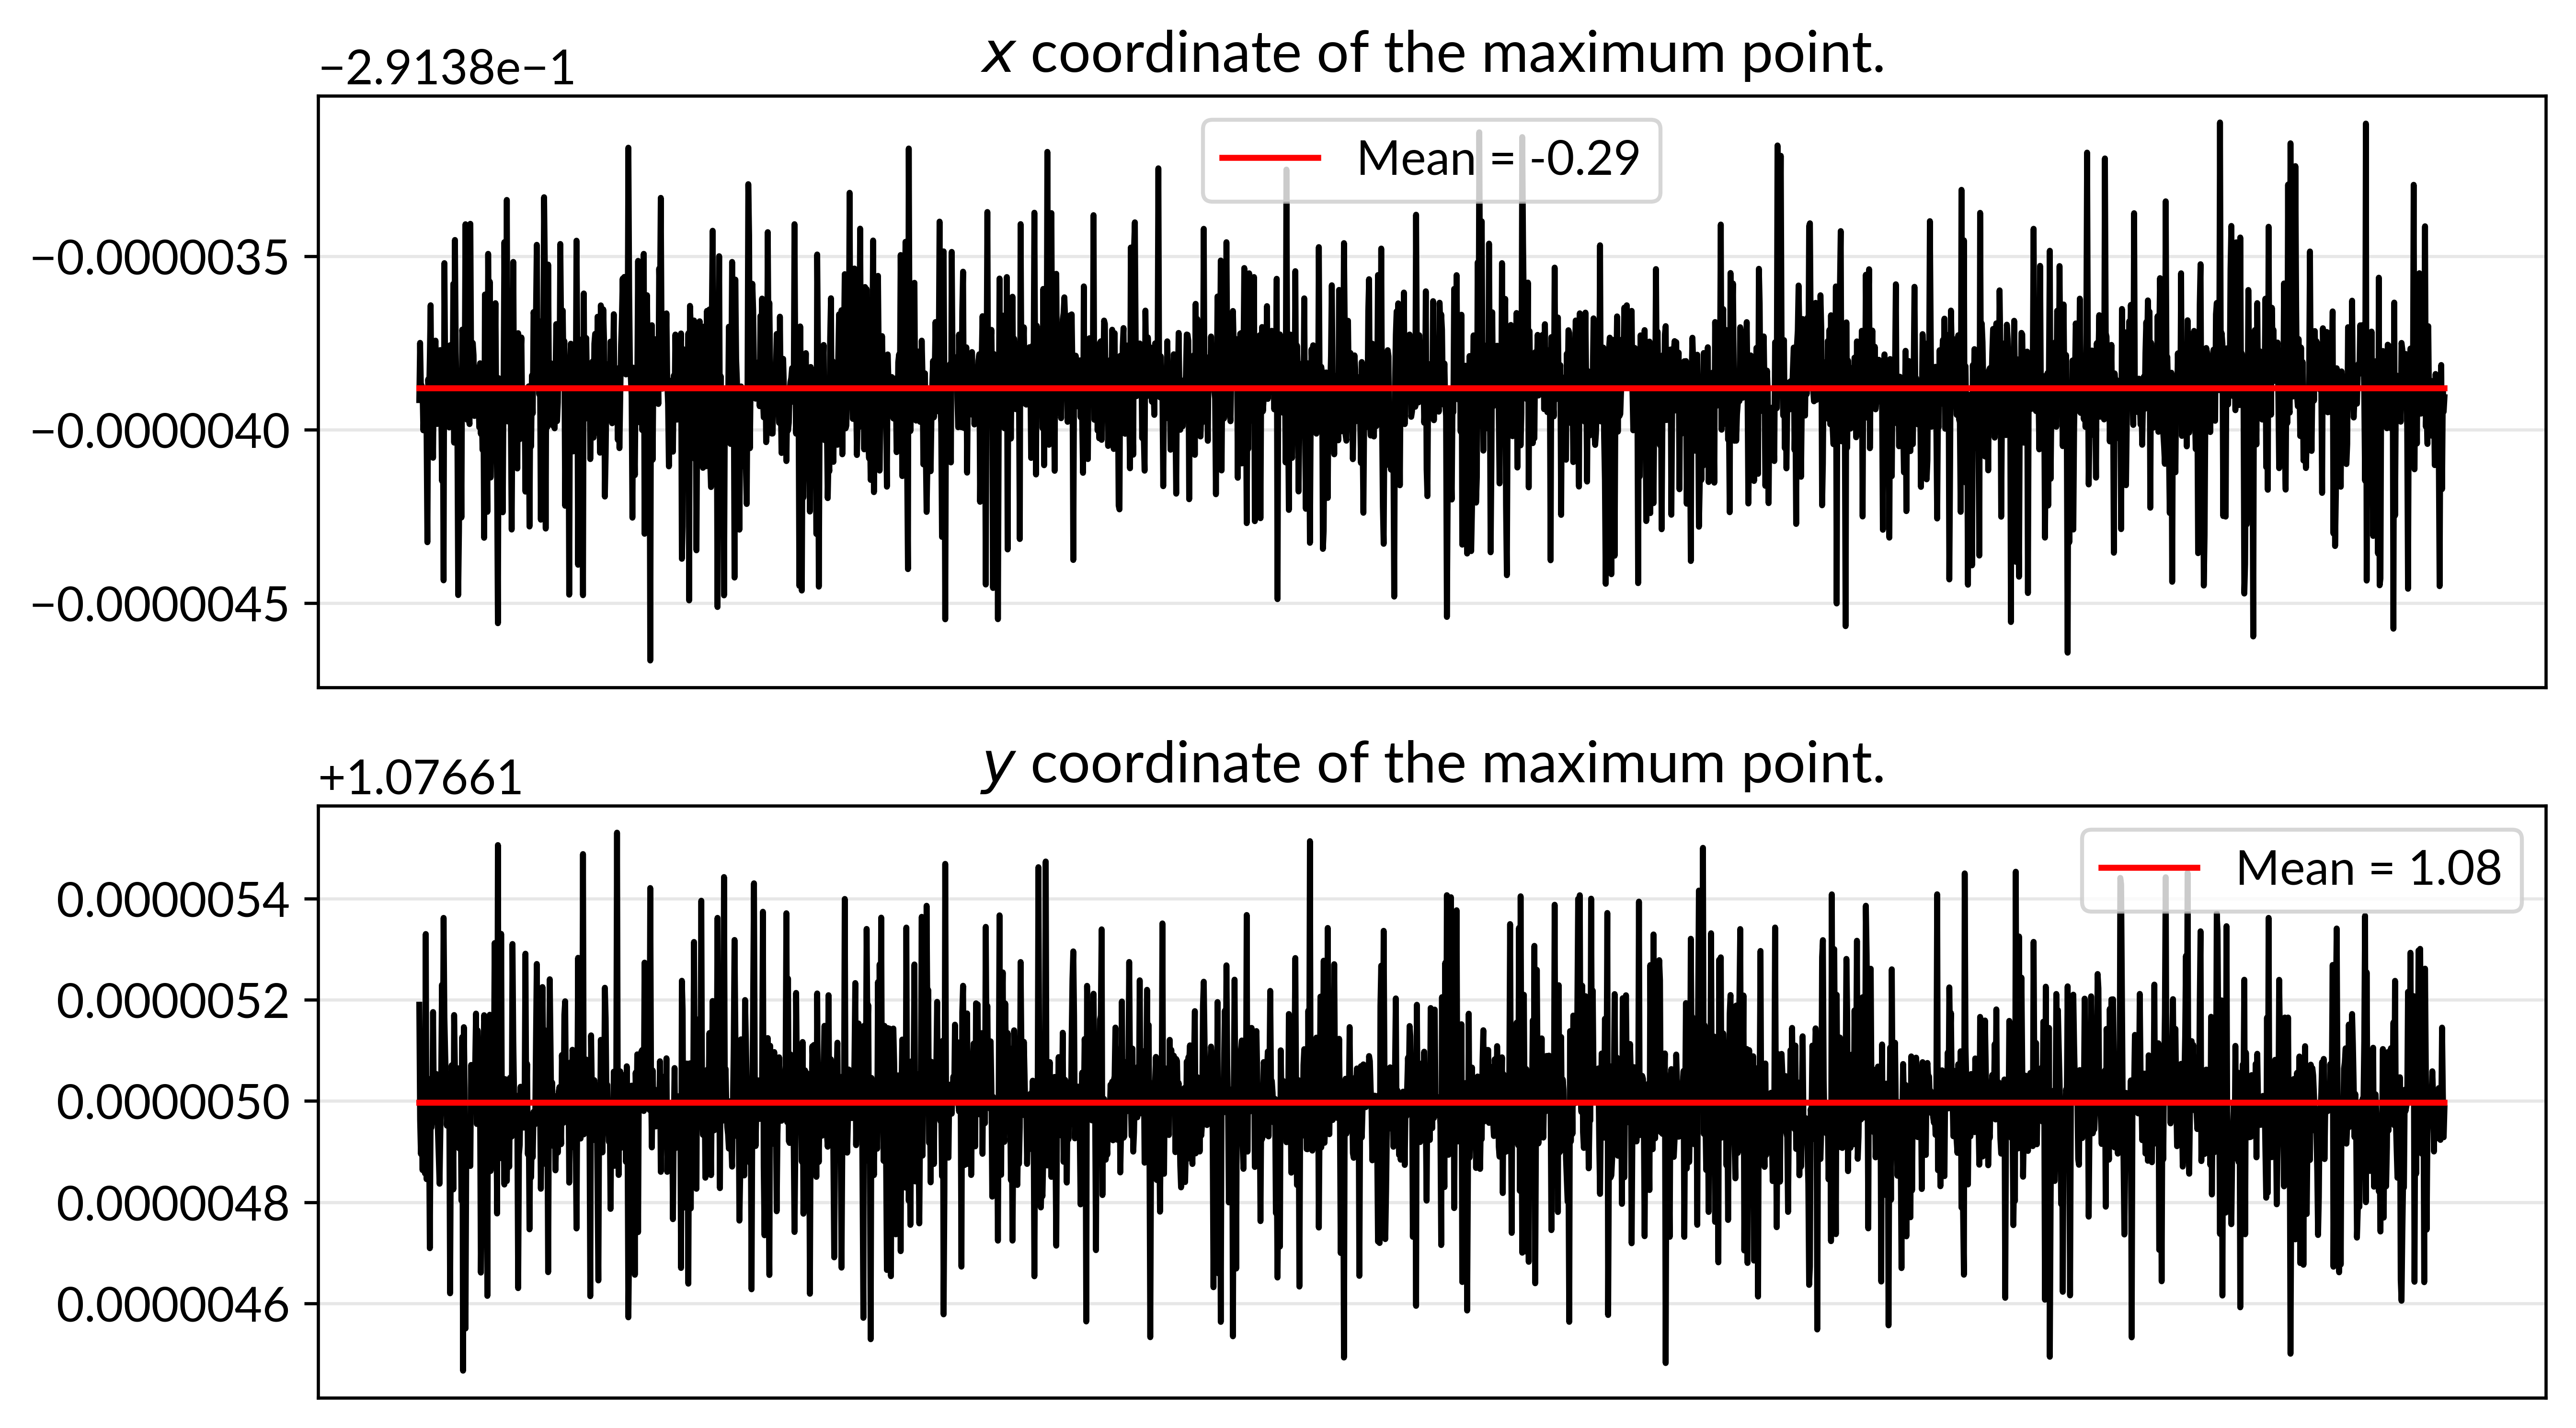

In [23]:
xs = maximum_pts[:, 0]
ys = maximum_pts[:, 1]

plt.subplot(2, 1, 1)
plt.plot(xs, color='black')
plt.plot(np.ones_like(xs)*np.mean(xs), 
         color='red', 
         label=f'Mean = {np.round(np.mean(xs), 2)}')
plt.title(r'$x$ coordinate of the maximum point.')
plt.xticks([])
plt.legend()
plt.grid(alpha=0.3)

plt.subplot(2, 1, 2)
plt.plot(ys, color='black')
plt.plot(np.ones_like(ys)*np.mean(ys), 
         color='red', 
         label=f'Mean = {np.round(np.mean(ys), 2)}')
plt.title(r'$y$ coordinate of the maximum point.')
plt.xticks([])
plt.legend()
plt.grid(alpha=0.3)

As we can see for each starting point the maximizer is found at almost the same point. The differences are there due to the precision of used algorithm. From that plots we can deduct that the maximizer is the $(-0.29, 1.08)$ point.